In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-ai-job-market-and-salary-trends-2025/ai_job_dataset.csv


## Global AI Job Market & Salary Trends 2025 - EDA

### Table of Contents
#### 1. Importing Libraries
#### 2. Loading Data
#### 3. Data Cleaning & Preprocessing 
#### 4. Exploratory Data Analysis - EDA

### 1. Importing Libraries

In [2]:
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set()
plt.style.use('bmh')
pd.set_option('display.max_columns',None)

### 2. Loading Data

In [3]:
jobs=pd.read_csv("/kaggle/input/global-ai-job-market-and-salary-trends-2025/ai_job_dataset.csv")
jobs.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


### 3. Data Cleaning & Preprocessing

In [4]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [5]:
jobs.describe()

,salary_usd,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,115348.965133,49.483333,6.253200,1503.314733,7.504273
std,60260.940438,40.812712,5.545768,576.127083,1.450870
min,32519.000000,0.000000,0.000000,500.000000,5.000000
25%,70179.750000,0.000000,2.000000,1003.750000,6.200000
50%,99705.000000,50.000000,5.000000,1512.000000,7.500000
75%,146408.500000,100.000000,10.000000,2000.000000,8.800000
max,399095.000000,100.000000,19.000000,2499.000000,10.000000


In [6]:
jobs.describe(include='object')

,job_id,job_title,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,required_skills,education_required,industry,posting_date,application_deadline,company_name
count,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000
unique,15000,20,3,4,4,20,3,20,13663,4,15,486,543,16
top,AI00001,Machine Learning Researcher,USD,MI,FT,Germany,S,Sweden,"Python, TensorFlow, PyTorch",Bachelor,Retail,2024-07-05,2025-01-05,TechCorp Inc
freq,1,808,11957,3781,3812,814,5007,790,17,3789,1063,51,47,980


In [7]:
jobs.isnull().sum()

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64

In [8]:
jobs.duplicated(subset='job_id').sum()

0

In [9]:
jobs.columns

Index(['job_id', 'job_title', 'salary_usd', 'salary_currency',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')

In [10]:
jobs['application_deadline'] = pd.to_datetime(jobs['application_deadline'])
jobs['posting_date'] = pd.to_datetime(jobs['posting_date'])
jobs[['application_deadline','posting_date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   application_deadline  15000 non-null  datetime64[ns]
 1   posting_date          15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 234.5 KB


In [11]:
jobs['posting_month']=jobs['posting_date'].dt.month
jobs['posting_year']=jobs['posting_date'].dt.year

In [12]:
jobs.drop(columns={'job_id','job_description_length','salary_currency'},axis=1,inplace=True)

In [13]:
#Inspecting Unique Values in Categorical Columns
cat_cols=jobs.select_dtypes(include=object)
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(f"Unique values ({jobs[col].nunique()}): {jobs[col].unique()}")
    print("-" * 40)


Column: job_title
Unique values (20): ['AI Research Scientist' 'AI Software Engineer' 'AI Specialist'
 'NLP Engineer' 'AI Consultant' 'AI Architect' 'Principal Data Scientist'
 'Data Analyst' 'Autonomous Systems Engineer' 'AI Product Manager'
 'Machine Learning Engineer' 'Data Engineer' 'Research Scientist'
 'ML Ops Engineer' 'Robotics Engineer' 'Head of AI'
 'Deep Learning Engineer' 'Data Scientist' 'Machine Learning Researcher'
 'Computer Vision Engineer']
----------------------------------------

Column: experience_level
Unique values (4): ['SE' 'EN' 'MI' 'EX']
----------------------------------------

Column: employment_type
Unique values (4): ['CT' 'FL' 'PT' 'FT']
----------------------------------------

Column: company_location
Unique values (20): ['China' 'Canada' 'Switzerland' 'India' 'France' 'Germany'
 'United Kingdom' 'Singapore' 'Austria' 'Sweden' 'South Korea' 'Norway'
 'Netherlands' 'United States' 'Israel' 'Australia' 'Ireland' 'Denmark'
 'Finland' 'Japan']
-----------

In [14]:
### Replacing Abbreviations with Full Labels
jobs['experience_level'].replace({'SE':'Senior','EN':'Entry','MI':'Mid','EX':'Executive'},inplace=True)
jobs['employment_type'].replace({'CT':'Contract','FL':'Freelance','PT':'Part-Time','FT':'Full-Time'},inplace=True)
jobs['company_size'].replace({'M':'Medium','L':'Large','S':'Small'},inplace=True)

In [15]:
jobs['remote_ratio'].unique()

array([ 50, 100,   0])

In [16]:
jobs.rename(columns={'remote_ratio':'work_type'},inplace=True)
jobs['work_type'].replace({0:'On-site',50:'Hybrid',100:'Fully remote'},inplace=True)

In [17]:
jobs.head()

,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,work_type,required_skills,education_required,years_experience,industry,posting_date,application_deadline,benefits_score,company_name,posting_month,posting_year
0,AI Research Scientist,90376,Senior,Contract,China,Medium,China,Hybrid,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,5.9,Smart Analytics,10,2024
1,AI Software Engineer,61895,Entry,Contract,Canada,Medium,Ireland,Fully remote,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,5.2,TechCorp Inc,11,2024
2,AI Specialist,152626,Mid,Freelance,Switzerland,Large,South Korea,On-site,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,9.4,Autonomous Tech,3,2025
3,NLP Engineer,80215,Senior,Freelance,India,Medium,India,Hybrid,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,8.6,Future Systems,12,2024
4,AI Consultant,54624,Entry,Part-Time,France,Small,Singapore,Fully remote,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,6.6,Advanced Robotics,4,2025


In [18]:
# Splitting skills in a separate columns
jobs['skills'] = jobs['required_skills'].str.split(',\s*')
jobs_exploded = jobs.explode('skills')

In [19]:
# Creating separate DataFrame for skills and their count
jobs2=jobs.copy()
jobs2['skills_list'] = jobs2['required_skills'].str.split(',\s*')
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
skills_encoded = pd.DataFrame(mlb.fit_transform(jobs2['skills_list']), columns=mlb.classes_)
skill_counts = skills_encoded.sum().sort_values(ascending=False)
skill_counts_df = skill_counts.reset_index()
skill_counts_df.columns = ['Skill', 'Total']
skill_counts_df

,Skill,Total
0,Python,4450
1,SQL,3407
2,TensorFlow,3022
3,Kubernetes,3009
4,Scala,2794
5,PyTorch,2777
6,Linux,2705
7,Git,2631
8,Java,2578
9,GCP,2442


### 4. Exploratory Data Analysis - EDA

In [20]:
# Identifying Top 3 Most Common Skills for Each Job
top_skills = (jobs_exploded.groupby(['job_title', 'skills'])['skills'].count().reset_index(name='total').sort_values(['job_title', 'total'], 
            ascending=[True, False]).groupby('job_title').head(3))
top_skills['rank'] = top_skills.groupby('job_title')['total'].rank(method='first', ascending=False).astype(int)
top_3_skills = top_skills.pivot(index='rank', columns='job_title', values='skills')
top_3_skills

job_title,AI Architect,AI Consultant,AI Product Manager,AI Research Scientist,AI Software Engineer,AI Specialist,Autonomous Systems Engineer,Computer Vision Engineer,Data Analyst,Data Engineer,Data Scientist,Deep Learning Engineer,Head of AI,ML Ops Engineer,Machine Learning Engineer,Machine Learning Researcher,NLP Engineer,Principal Data Scientist,Research Scientist,Robotics Engineer
rank,,,,,,,,,,,,,,,,,,,,
1,Python,Python,Python,Python,Python,Python,Python,Python,Python,Python,Python,Python,Python,Python,Python,Python,Python,Python,Python,Python
2,SQL,SQL,SQL,Kubernetes,SQL,SQL,SQL,SQL,Kubernetes,TensorFlow,SQL,SQL,SQL,SQL,SQL,Kubernetes,SQL,SQL,SQL,SQL
3,Linux,PyTorch,Scala,SQL,TensorFlow,PyTorch,Kubernetes,Scala,SQL,Kubernetes,TensorFlow,PyTorch,Scala,TensorFlow,TensorFlow,SQL,Kubernetes,Linux,TensorFlow,PyTorch


#### Visualization

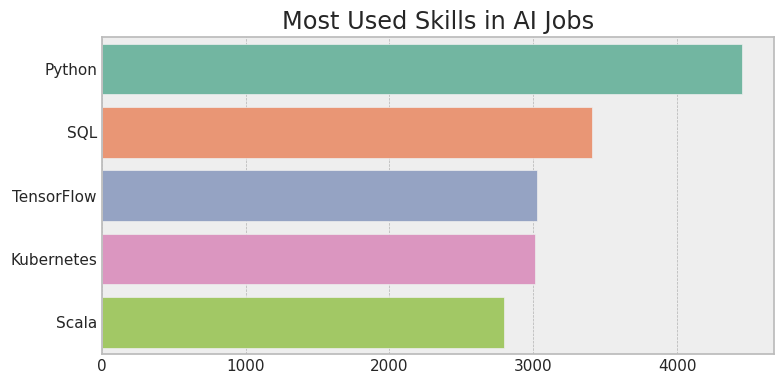

In [21]:
plt.figure(figsize=(8, 4))
sns.barplot(data=skill_counts_df.head(5), x='Total', y='Skill',palette='Set2')
plt.title('Most Used Skills in AI Jobs')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

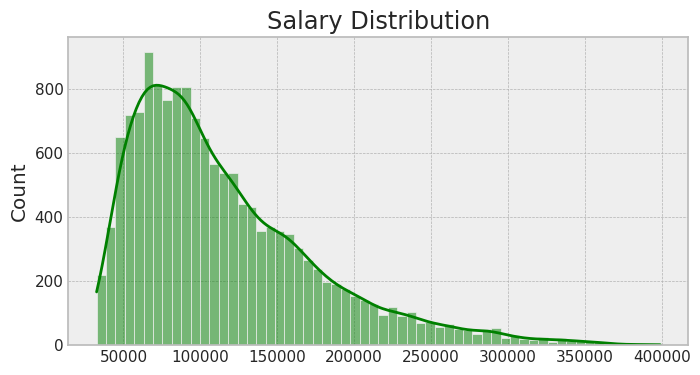

In [22]:
plt.figure(figsize=(8,4))
sns.histplot(jobs['salary_usd'], kde=True,color='green')
plt.title('Salary Distribution')
plt.xlabel('')
plt.show()

### Since the salary distribution is **right-skewed**, we'll use the median  instead of the mean to better represent the average salary.

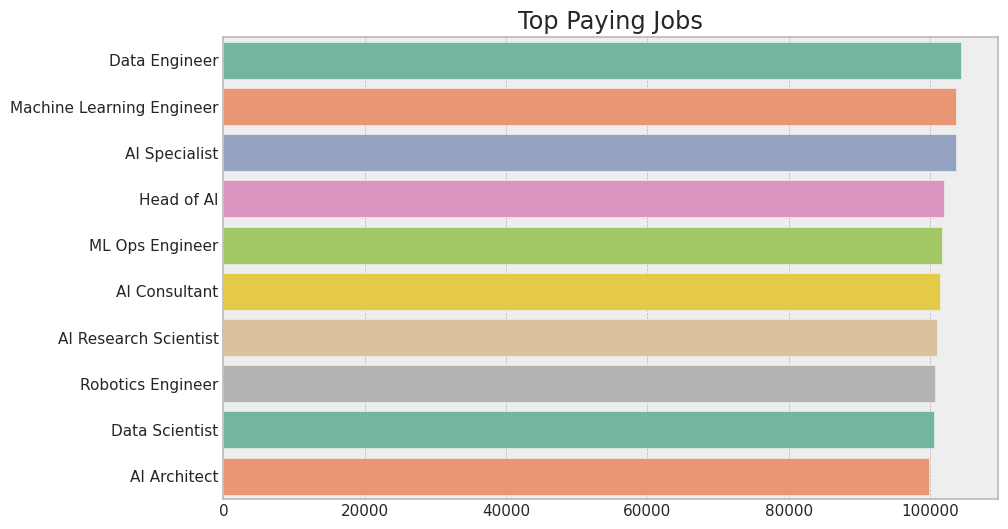

In [23]:
avg_salary=jobs.groupby('job_title')['salary_usd'].median().reset_index(name='avg_salary').sort_values(by='avg_salary',ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=avg_salary,x='avg_salary',y='job_title',palette='Set2')
plt.title('Top Paying Jobs')
plt.xlabel('')
plt.ylabel('')
plt.show()

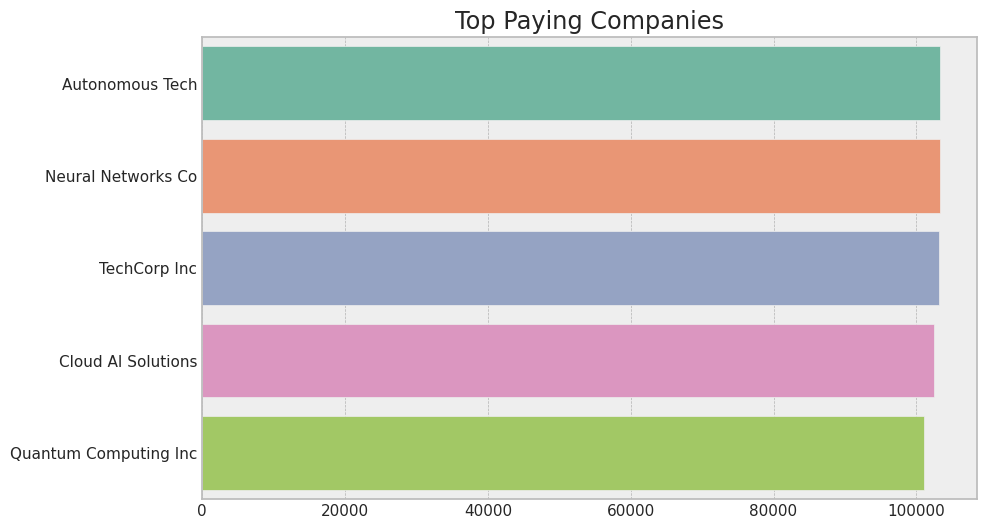

In [24]:
top_paying_companies=jobs.groupby('company_name')['salary_usd'].median().reset_index(name='avg_salary').sort_values(by='avg_salary',ascending=False).head(5)
plt.figure(figsize=(10,6))
sns.barplot(data=top_paying_companies,x='avg_salary',y='company_name',palette='Set2')
plt.title('Top Paying Companies')
plt.xlabel('')
plt.ylabel('')
plt.show()

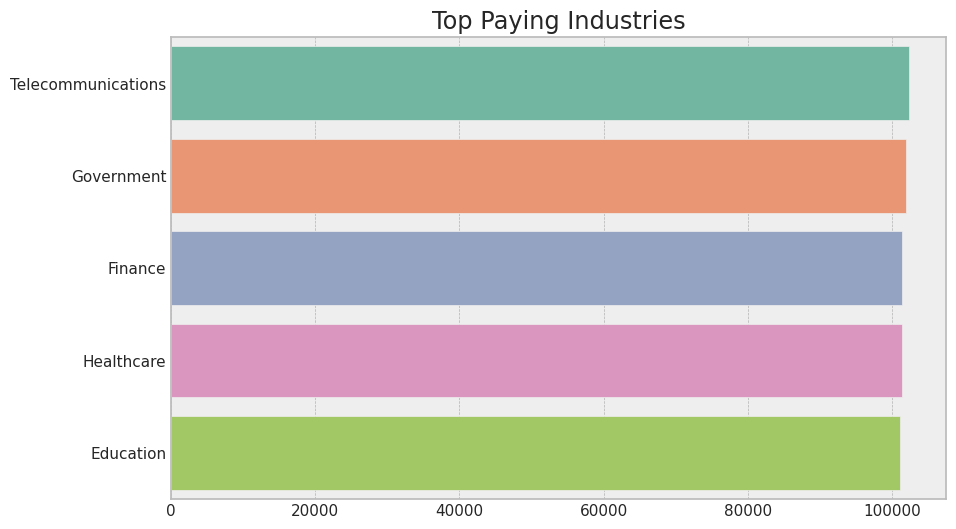

In [25]:
avg_salary=jobs.groupby('industry')['salary_usd'].median().reset_index(name='avg_salary').sort_values(by='avg_salary',ascending=False).head(5)
plt.figure(figsize=(10,6))
sns.barplot(data=avg_salary,x='avg_salary',y='industry',palette='Set2')
plt.title('Top Paying Industries')
plt.xlabel('')
plt.ylabel('')
plt.show()

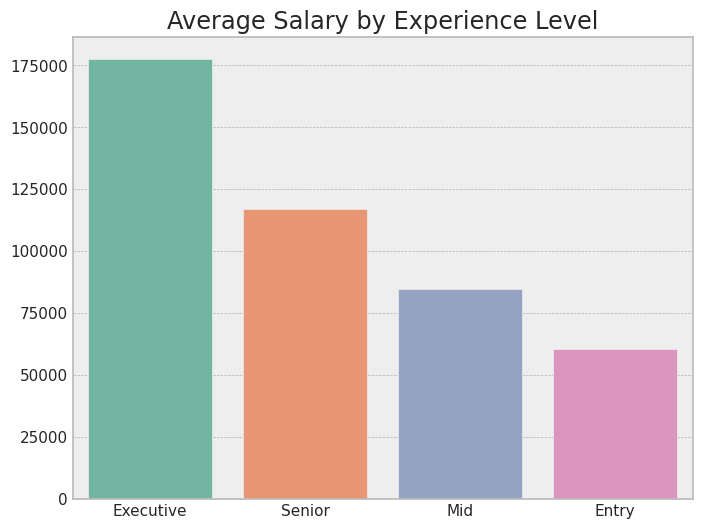

In [26]:
experience_salary=jobs.groupby('experience_level')['salary_usd'].median().reset_index(name='avg_salary').sort_values(by='avg_salary',ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(data=experience_salary,x='experience_level',y='avg_salary',palette='Set2')
plt.title('Average Salary by Experience Level')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [27]:
# Average Years of Expereience for each Level
jobs.groupby('experience_level')['years_experience'].mean().round().reset_index(name='avg_years_of_experience').sort_values(by='avg_years_of_experience')

,experience_level,avg_years_of_experience
0,Entry,0.0
2,Mid,3.0
3,Senior,7.0
1,Executive,14.0


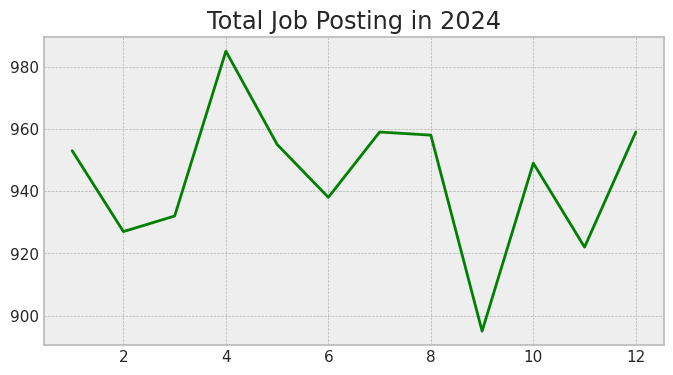

In [28]:
total_job_postings=jobs[jobs['posting_year']==2024].groupby('posting_month')['posting_month'].count().reset_index(name='total')
plt.figure(figsize=(8,4))
sns.lineplot(data=total_job_postings,x='posting_month',y='total',color='green')
plt.title('Total Job Posting in 2024')
plt.xlabel('')
plt.ylabel('')
plt.show()

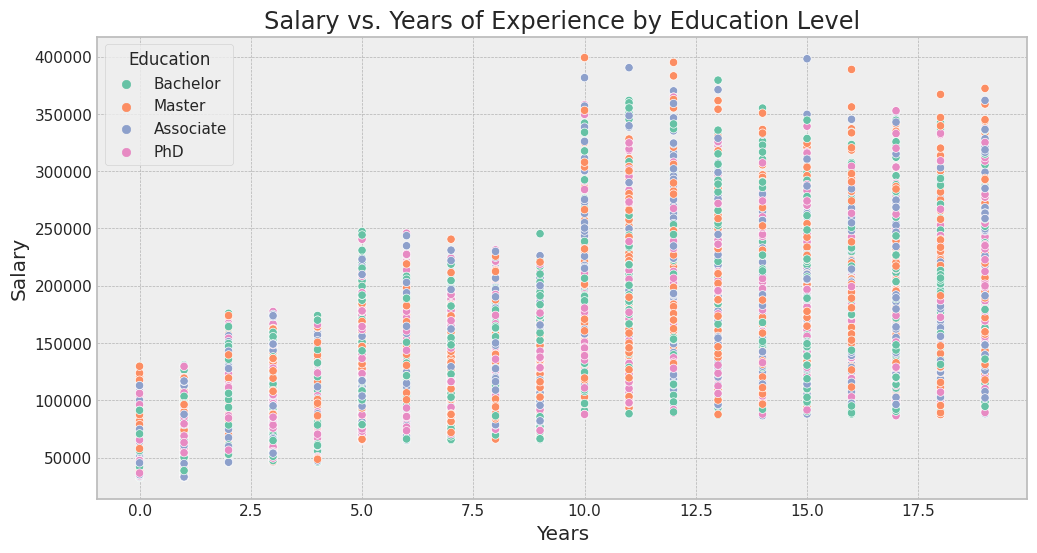

In [29]:
# Salary is higher with more experience
plt.figure(figsize=(12,6))
sns.scatterplot(data=jobs, x='years_experience', y='salary_usd', hue='education_required',palette='Set2')
plt.title('Salary vs. Years of Experience by Education Level')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.legend(title='Education')
plt.show()

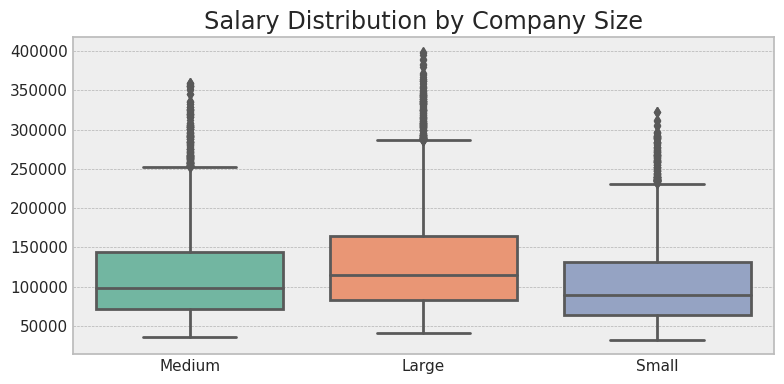

In [30]:
plt.figure(figsize=(8,4))
sns.boxplot(data=jobs,x='company_size',y='salary_usd',palette='Set2')
plt.title('Salary Distribution by Company Size')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

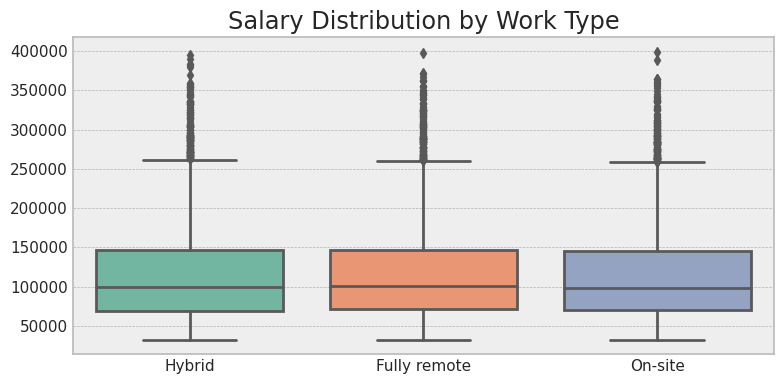

In [31]:
plt.figure(figsize=(8,4))
sns.boxplot(data=jobs,x='work_type',y='salary_usd',palette='Set2')
plt.title('Salary Distribution by Work Type')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

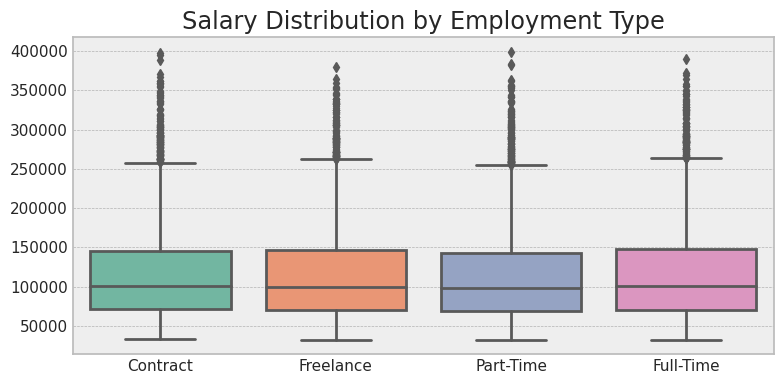

In [32]:
plt.figure(figsize=(8,4))
sns.boxplot(data=jobs,x='employment_type',y='salary_usd',palette='Set2')
plt.title('Salary Distribution by Employment Type')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

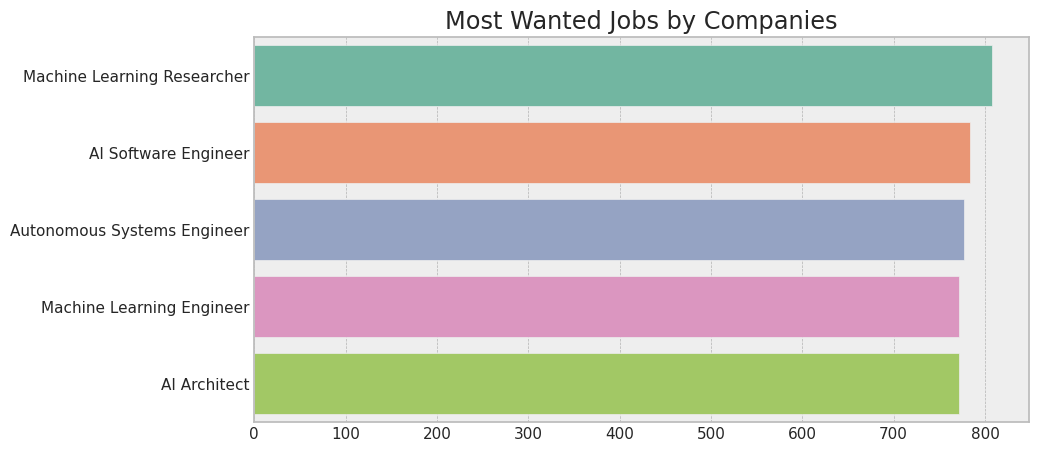

In [33]:
most_wanted=jobs.groupby('job_title')['job_title'].count().reset_index(name='total').sort_values(by='total',ascending=False).head(5)
plt.figure(figsize=(10,5))
sns.barplot(data=most_wanted,x='total',y='job_title',palette="Set2")
plt.title('Most Wanted Jobs by Companies')
plt.xlabel('')
plt.ylabel('')
plt.show()

#### Plotly Map

In [34]:
avg_salary = jobs.groupby('company_location', as_index=False)['salary_usd'].mean()
avg_salary['salary_usd'] = avg_salary['salary_usd'].round(2)
avg_salary = avg_salary.rename(columns={
    'company_location': 'Country',
    'salary_usd': 'Avg. Salary'
})

top_jobs = (jobs.groupby(['company_location', 'job_title']).size().reset_index(name='count').sort_values(['company_location', 'count'], ascending=[True, False])
    .drop_duplicates('company_location').rename(columns={'company_location': 'Country', 'job_title': 'Top Job'}))

merged = pd.merge(avg_salary, top_jobs, on='Country')

fig = px.scatter_geo(
    merged,
    locations="Country",
    locationmode="country names",
    size="Avg. Salary",
    color="Country",
    hover_name="Country",
    hover_data={
        "Country": False,
        "Avg. Salary": True,
        "Top Job": True
    },
    size_max=40,
    projection="equirectangular",
    title="Average Salary and Most Wanted Job by Country"
)

fig.update_layout(
        title={
        'text': "Average Salary and Most Wanted Job by Country",
        'x': 0.5},
    width=1000,
    height=600,
    geo=dict(
        showland=True,
        landcolor="LightGray",
        showcountries=True
    )
)


fig.show()

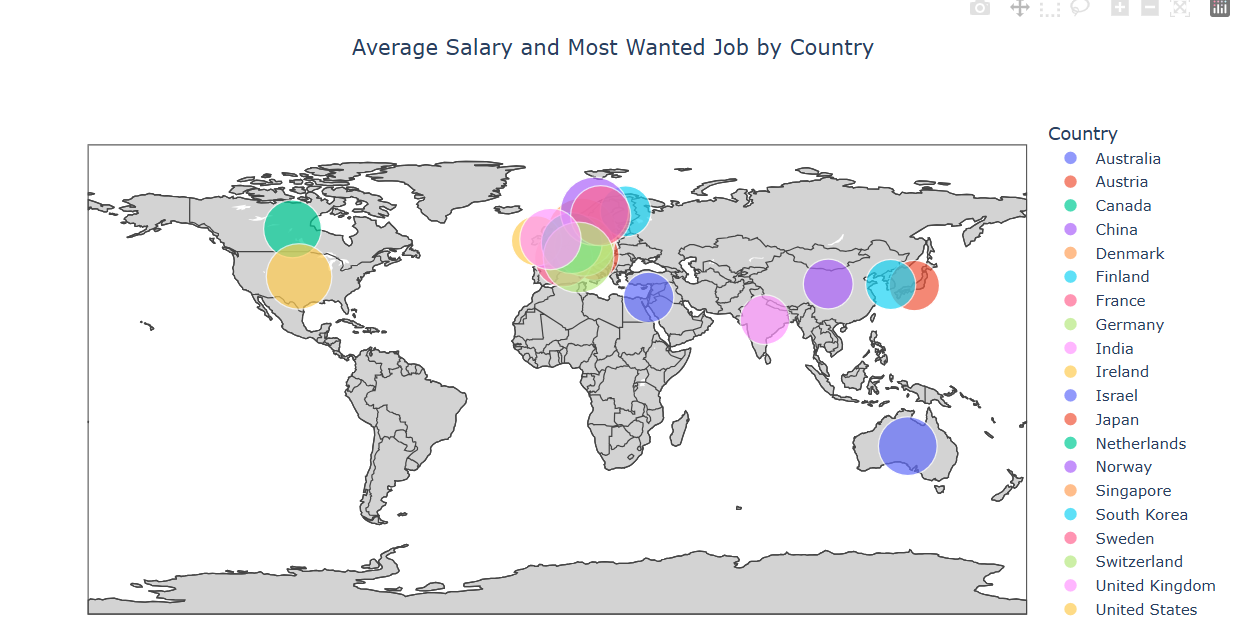